6.52644933321060
[0.987648185826733, 0.998027509969938, 1.00009181445943, 1.00005758654352, 1.00000030983573, 1.00500619561255, 0.999999424553588, 1.00247891584792, 1.00000008706352] [2, 3, 4, 5, 6, 7, 8, 9, 10]


Text(0, 0.5, 'Corriente')

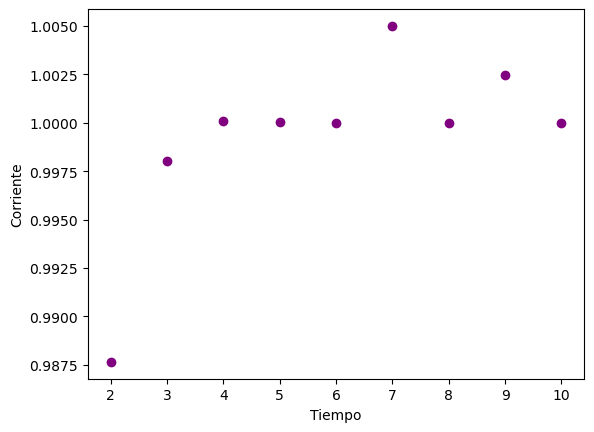

In [50]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
x = sym.Symbol('x',real=True)
y = sym.Symbol('y',real=True)
#Inciso a)
##Primero sacamos los pesos de los polinomios de Laguerre
def GetLaguerre(n, x):
    if n == 0:
        return sym.Pow(1, 1)
    elif n == 1:
        return 1 - x
    else:
        laguerre_n_minus_1 = GetLaguerre(n - 1, x)
        laguerre_n_minus_2 = GetLaguerre(n - 2, x)
        return ((2 * n - 1 - x) * laguerre_n_minus_1 - (n - 1) * laguerre_n_minus_2) / n


def GetDLaguerre(n,x):
    Pn = GetLaguerre(n,x)
    return sym.diff(Pn,x,1)

def GetNewton(f,df,xn,itmax=10000,precision=1e-14):
    
    error = 1.
    it = 0
    
    while error >= precision and it < itmax:
        
        try:
            
            xn1 = xn - f(xn)/df(xn)
            
            error = np.abs(f(xn)/df(xn))
            
        except ZeroDivisionError:
            print('Zero Division')
            
        xn = xn1
        it += 1
        
    if it == itmax:
        return False
    else:
        return xn
    
def GetRootsGLag(f,df,x,tolerancia = 14):
    
    Roots = np.array([])
    
    for i in x:
        
        root = GetNewton(f,df,i)
    
        croot = np.round( root, tolerancia )
        
        if croot not in Roots:
            Roots = np.append(Roots, croot)
                
    Roots.sort()
    
    return Roots

def GetAllRootsGLag(n):

    xn = np.linspace(0,n+((n+1)*np.sqrt(n)),100)
    
    Laguerre = []
    DLaguerre = []
    
    for i in range(n+1):
        Laguerre.append(GetLaguerre(i,x))
        DLaguerre.append(GetDLaguerre(i,x))
    
    poly = sym.lambdify([x],Laguerre[n],'numpy')
    Dpoly = sym.lambdify([x],DLaguerre[n],'numpy')
    Roots = GetRootsGLag(poly,Dpoly,xn)
    
    return Roots

def GetWeightsGLag(n):

    Roots = GetAllRootsGLag(n) 
    Weights = []
    for i in range(len(Roots)):
        Laguerre_n_plus_1 = GetLaguerre(n + 1, Roots[i])
        weight = Roots[i]/ ((n + 1) ** 2 * (Laguerre_n_plus_1 ** 2))
        Weights.append(weight)

    
    return Weights
##Ahora definimos la funcion a integrar y la función que integra
def funcion_cuerpo_negro (x):
    return (x**3)/(1-np.e**(-x))

def Integral (n):
    raices = GetAllRootsGLag(n)
    pesos = GetWeightsGLag(n)
    I = 0
    for i in range(n):
        I += pesos[i]*funcion_cuerpo_negro(raices[i])
    return I
valor_integral=Integral(3)


#Inciso b)
## Definamos la funcion que calcula el error relativo
def error_relativo (n):
    return Integral(n)/((np.pi**4)/15)
def lista (n):
    errores=[]
    for i in range(2,n+1):
        error_i=error_relativo(i)
        errores.append(error_i)
    return errores
ejey=list(range(2,11))
ejex=lista(10)
print(ejex, ejey)
plt.scatter(ejey, ejex, color='purple')
plt.xlabel('Tiempo')
plt.ylabel('Corriente')
